In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import pandasql as ps
import time
from datetime import datetime
from IPython.display import display #displays full dataframe columns

#Figures inline and set visualization style (just so figures are presented in this notebook and not exported)
%matplotlib inline
sns.set()

#display all dataframe columns when printed
pd.options.display.max_columns = None

In [2]:
#Load datasets
demog = pd.read_csv('C:/Users/Mark.Burghart/Documents/projects/hospice_carepoint/data/raw/carepoint_demog_raw.csv') #Demographics
esas = pd.read_csv('C:/Users/Mark.Burghart/Documents/projects/hospice_carepoint/data/raw/carepoint_ESAS_raw.csv') #ESAS results
icd10_cluster = pd.read_csv('C:/Users/Mark.Burghart/Documents/projects/hospice_carepoint/data/raw/ICD10_clusters.csv', encoding="UTF-8")
icd10_group = pd.read_csv('C:/Users/Mark.Burghart/Documents/projects/hospice_carepoint/data/raw/icd10_cm_order_2018.csv', encoding="UTF-8")

In [3]:
demog.head()

,AdmissionKey,PatientKey,ZIPCode,StartOfCare,DischargeDate,patienttaskkey,gender,DateofBirth,DischargeType,DischargeStatus,DischargeReason,AdvanceDirective,TerminalDiagnosis,DiagnosisDesc,ReferralType,LevelofCare,Race,InsuranceType
0,3541,1778654,94301,2017-09-18 00:00:00.000,NaN,408617268,1,1932-12-12 00:00:00.000,NaN,NaN,NaN,Yes - Do Not Resuscitate (DNR),NaN,NaN,Transfer from hospital,NaN,White,Self-Pay
1,2683365,2390223,93402,2017-12-29 00:00:00.000,2018-02-20 00:00:00.000,424605062,2,1922-11-18 00:00:00.000,Revocation,Discharge to Home or Self Care,NaN,Yes - Do Not Resuscitate (DNR),I679,"Cerebrovascular disease, unspecified",Clinic or physician's office,Routine,White,Medicare Traditional
2,2683365,2390223,93402,2017-12-29 00:00:00.000,2018-02-20 00:00:00.000,425208269,2,1922-11-18 00:00:00.000,Revocation,Discharge to Home or Self Care,NaN,Yes - Do Not Resuscitate (DNR),I679,"Cerebrovascular disease, unspecified",Clinic or physician's office,Routine,White,Medicare Traditional
3,2683365,2390223,93402,2017-12-29 00:00:00.000,2018-02-20 00:00:00.000,425208272,2,1922-11-18 00:00:00.000,Revocation,Discharge to Home or Self Care,NaN,Yes - Do Not Resuscitate (DNR),I679,"Cerebrovascular disease, unspecified",Clinic or physician's office,Routine,White,Medicare Traditional
4,2683365,2390223,93402,2017-12-29 00:00:00.000,2018-02-20 00:00:00.000,425208274,2,1922-11-18 00:00:00.000,Revocation,Discharge to Home or Self Care,NaN,Yes - Do Not Resuscitate (DNR),I679,"Cerebrovascular disease, unspecified",Clinic or physician's office,Routine,White,Medicare Traditional


In [4]:
esas.head(100)

,patientkey,admissionkey,StartOfCare,DischargeDate,patienttaskkey,ESASName,ESASValue,TaskTargetDate,VisitDate
0,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Anxiety,0,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
1,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Depression,0,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
2,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Drowsiness,9,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
3,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Lack of Appetite,8,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
4,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Nausea,0,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
5,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Pain,3,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
6,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Shortness of Breath,7,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
7,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Tiredness,9,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
8,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Wellbeing,8,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000
9,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290417,Anxiety,0,2017-05-15 00:00:00.000,2017-05-15 00:00:00.000


## Cleaning and Structure
Create dataframe with one row representing a visit, along with ESAS data for said visit.<br>
<br>

### ESAS Dataset transformations
    


In [5]:
#pivot ESASName with ESASValue column into esas_pivot
esas_pivot = esas.pivot_table(index='patienttaskkey', columns='ESASName', values='ESASValue')
esas_pivot = esas_pivot.fillna(99).astype(int) #convert floats to integers and fill nas with '11'
esas_pivot.columns = [c.replace(' ', '_') for c in esas_pivot.columns] #replace space with _

In [6]:
#Join exloded ESAS view to other dataframe
q = """Select distinct * from (
    Select x.patientkey as PatientKey
    ,x.admissionkey as AdmissionKey
    ,x.StartOfCare
    ,x.DischargeDate
    ,x.patienttaskkey
    ,x.TaskTargetDate
    ,x.VisitDate
    ,y.*
    from esas as x
    inner join esas_pivot as y
    on x.patienttaskkey = y.patienttaskkey
    ) as tmp
"""

esas_piv = ps.sqldf(q, locals())
esas_piv.head(10)

,PatientKey,AdmissionKey,StartOfCare,DischargeDate,patienttaskkey,TaskTargetDate,VisitDate,patienttaskkey:1,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing
0,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,362160127,0,0,9,8,0,3,7,9,8
1,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290417,2017-05-15 00:00:00.000,2017-05-15 00:00:00.000,362290417,0,11,8,8,0,0,7,8,8
2,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290418,2017-05-29 00:00:00.000,2017-05-29 00:00:00.000,362290418,0,11,8,8,0,0,7,9,8
3,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290419,2017-06-12 00:00:00.000,2017-06-12 00:00:00.000,362290419,0,11,8,8,0,0,7,8,8
4,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429188,2017-05-04 00:00:00.000,2017-05-04 00:00:00.000,362429188,0,0,0,0,0,0,0,11,11
5,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429189,2017-05-08 00:00:00.000,2017-05-08 00:00:00.000,362429189,0,0,0,0,0,0,0,0,11
6,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429190,2017-05-11 00:00:00.000,2017-05-10 00:00:00.000,362429190,0,0,0,11,0,0,0,11,99
7,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429191,2017-05-18 00:00:00.000,2017-05-16 00:00:00.000,362429191,0,0,0,11,0,0,0,0,11
8,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429192,2017-05-25 00:00:00.000,2017-05-25 00:00:00.000,362429192,0,99,0,11,0,0,0,11,99
9,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429194,2017-05-22 00:00:00.000,2017-05-22 00:00:00.000,362429194,0,11,0,11,0,0,0,11,99


In [7]:
#Resolving 11,99 values in ESAS Results: This needs to be done, as I'm taking averages and max values for some feature engineering later. Converting to NaNs
# ESAS is on 0-10 scale, so the 11s and 99s are indicative of other events (no result, or unable to assess)

#convert to nans
esas_piv = esas_piv.replace(11, np.nan)
esas_piv = esas_piv.replace(99, np.nan)
esas_piv.head()

,PatientKey,AdmissionKey,StartOfCare,DischargeDate,patienttaskkey,TaskTargetDate,VisitDate,patienttaskkey:1,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing
0,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,362160127,0.0,0.0,9.0,8.0,0.0,3.0,7.0,9.0,8.0
1,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290417,2017-05-15 00:00:00.000,2017-05-15 00:00:00.000,362290417,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0
2,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290418,2017-05-29 00:00:00.000,2017-05-29 00:00:00.000,362290418,0.0,NaN,8.0,8.0,0.0,0.0,7.0,9.0,8.0
3,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290419,2017-06-12 00:00:00.000,2017-06-12 00:00:00.000,362290419,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0
4,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429188,2017-05-04 00:00:00.000,2017-05-04 00:00:00.000,362429188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [8]:
esas_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475019 entries, 0 to 475018
Data columns (total 17 columns):
PatientKey             475019 non-null int64
AdmissionKey           475019 non-null int64
StartOfCare            475019 non-null object
DischargeDate          268083 non-null object
patienttaskkey         475019 non-null int64
TaskTargetDate         475019 non-null object
VisitDate              475019 non-null object
patienttaskkey:1       475019 non-null int64
Anxiety                413453 non-null float64
Depression             352199 non-null float64
Drowsiness             430938 non-null float64
Lack_of_Appetite       427200 non-null float64
Nausea                 416450 non-null float64
Pain                   449732 non-null float64
Shortness_of_Breath    445429 non-null float64
Tiredness              428220 non-null float64
Wellbeing              379516 non-null float64
dtypes: float64(9), int64(4), object(4)
memory usage: 61.6+ MB


**475,019 visits with ESAS data**

In [9]:
#convert variable types
#datetimes
esas_piv['StartOfCare'] = pd.to_datetime(esas_piv['StartOfCare'], format = '%Y-%m-%d %H:%M:%S.%f')
esas_piv['DischargeDate'] = pd.to_datetime(esas_piv['DischargeDate'], format = '%Y-%m-%d %H:%M:%S.%f')
esas_piv['TaskTargetDate'] = pd.to_datetime(esas_piv['TaskTargetDate'], format = '%Y-%m-%d %H:%M:%S.%f')
esas_piv['VisitDate'] = pd.to_datetime(esas_piv['VisitDate'], format = '%Y-%m-%d %H:%M:%S.%f')

#factors
esas_piv['PatientKey'] = esas_piv['PatientKey'].astype('category')
esas_piv['AdmissionKey'] = esas_piv['AdmissionKey'].astype('category')
esas_piv['patienttaskkey'] = esas_piv['patienttaskkey'].astype('category')


# create variable for data cutpoint
day = pd.DateOffset(days = 7)
esas_piv['cutdate'] = esas_piv['DischargeDate'].subtract(day)
esas_piv['LengthOfCare_days'] = (esas_piv['VisitDate'] - esas_piv['StartOfCare']).dt.days

esas_piv.head(100)

,PatientKey,AdmissionKey,StartOfCare,DischargeDate,patienttaskkey,TaskTargetDate,VisitDate,patienttaskkey:1,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days
0,2839565,5567524,2017-05-01,2017-07-03,362160127,2017-05-01,2017-05-01,362160127,0.0,0.0,9.0,8.0,0.0,3.0,7.0,9.0,8.0,2017-06-26,0
1,2839565,5567524,2017-05-01,2017-07-03,362290417,2017-05-15,2017-05-15,362290417,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26,14
2,2839565,5567524,2017-05-01,2017-07-03,362290418,2017-05-29,2017-05-29,362290418,0.0,NaN,8.0,8.0,0.0,0.0,7.0,9.0,8.0,2017-06-26,28
3,2839565,5567524,2017-05-01,2017-07-03,362290419,2017-06-12,2017-06-12,362290419,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26,42
4,2839565,5567524,2017-05-01,2017-07-03,362429188,2017-05-04,2017-05-04,362429188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2017-06-26,3
5,2839565,5567524,2017-05-01,2017-07-03,362429189,2017-05-08,2017-05-08,362429189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2017-06-26,7
6,2839565,5567524,2017-05-01,2017-07-03,362429190,2017-05-11,2017-05-10,362429190,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26,9
7,2839565,5567524,2017-05-01,2017-07-03,362429191,2017-05-18,2017-05-16,362429191,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2017-06-26,15
8,2839565,5567524,2017-05-01,2017-07-03,362429192,2017-05-25,2017-05-25,362429192,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26,24
9,2839565,5567524,2017-05-01,2017-07-03,362429194,2017-05-22,2017-05-22,362429194,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26,21


Everything ESAS-related is looking pretty good. One row per visit (VisitDate), with the ESAS results on the row representing what was documented that visit. Also have `cutdate` variable, representing the timepoint I need to start determining if someone passed away or not at (7 day mortality, this is the '7 day' part).<br><br>
There are some odd data points I'll have to deal with, namely values of '11' and '99' for the results. Typically, '99' means missing, but not sure. '11' could mean 'unable to assess' patient.<br><br>



[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0')]

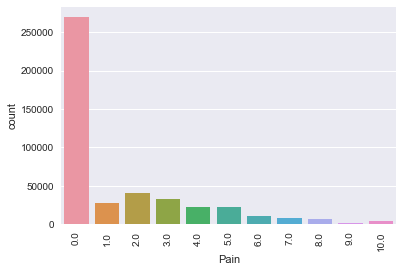

In [10]:
#plots of various ESAS results (frequency plots)
#pain
bar = sns.countplot(x = 'Pain', data = esas_piv)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0')]

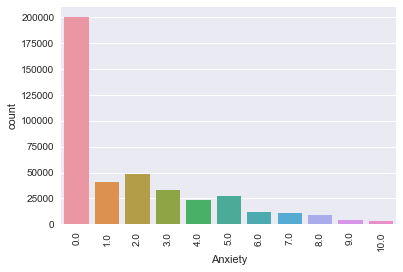

In [11]:
#anxiety
bar = sns.countplot(x = 'Anxiety', data = esas_piv)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0')]

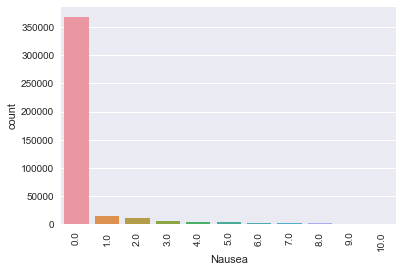

In [12]:
#nausea
bar = sns.countplot(x = 'Nausea', data = esas_piv)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)

In [13]:
esas_piv.describe()

,patienttaskkey:1,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,LengthOfCare_days
count,4.750190e+05,413453.000000,352199.000000,430938.000000,427200.000000,416450.000000,449732.000000,445429.000000,428220.000000,379516.000000,475019.000000
mean,4.095910e+08,1.841448,1.789644,3.399714,3.943890,0.359962,1.465564,1.984402,4.711289,4.358536,58.553875
std,2.205793e+07,2.405904,2.378906,3.230149,3.096913,1.256214,2.280361,2.517461,2.883255,2.638013,63.207406
min,3.570683e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-199.000000
25%,3.923924e+08,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,10.000000
50%,4.116603e+08,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,1.000000,5.000000,5.000000,36.000000
75%,4.278324e+08,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,3.000000,7.000000,6.000000,90.000000
max,4.484113e+08,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3652.000000


From the descriptive statistics above, `LengthOfCare_day` seems off. The minimum values was -199 days, which should be impossible, and the maximum length of care is over 3,000 days. Again, this should be impossible from a hospice standpoint. <br><br>
Truncating and removing rows (visits/admissions/patients) with a negative length of care, or maximum length of care of 3 years is needed.


In [14]:
#remove rows with negative length of stay and max of 3 years
esas_sub = esas_piv.loc[esas_piv['LengthOfCare_days'] >= 0]
esas_sub = esas_sub.loc[esas_sub['LengthOfCare_days'] < (365.25*3)]
esas_sub.describe()

,patienttaskkey:1,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,LengthOfCare_days
count,4.746170e+05,413073.000000,351829.000000,430547.000000,426810.000000,416076.000000,449357.000000,445037.000000,427840.000000,379131.000000,474617.000000
mean,4.096128e+08,1.841067,1.789716,3.399873,3.943750,0.359581,1.465149,1.984491,4.711995,4.358533,58.617131
std,2.204731e+07,2.405551,2.378873,3.230338,3.096976,1.255684,2.280127,2.517209,2.883106,2.638298,62.807916
min,3.570683e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.924296e+08,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,10.000000
50%,4.116775e+08,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,1.000000,5.000000,5.000000,36.000000
75%,4.278399e+08,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,3.000000,7.000000,6.000000,90.000000
max,4.484113e+08,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,621.000000


Subsetting `esas_piv` eliminated only 402 rows. Now, the dataframe contains all positive length of cares, with the max length of care being 621 (which still is likely high, but will leave for now).<br><br>
Now that the ESAS data is structured appropriately, I'll join in the demographic data to this dataframe prior to starting feature engineering.

In [15]:
esas_sub.info()
esas_sub.head(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474617 entries, 0 to 475018
Data columns (total 19 columns):
PatientKey             474617 non-null category
AdmissionKey           474617 non-null category
StartOfCare            474617 non-null datetime64[ns]
DischargeDate          267839 non-null datetime64[ns]
patienttaskkey         474617 non-null category
TaskTargetDate         474617 non-null datetime64[ns]
VisitDate              474617 non-null datetime64[ns]
patienttaskkey:1       474617 non-null int64
Anxiety                413073 non-null float64
Depression             351829 non-null float64
Drowsiness             430547 non-null float64
Lack_of_Appetite       426810 non-null float64
Nausea                 416076 non-null float64
Pain                   449357 non-null float64
Shortness_of_Breath    445037 non-null float64
Tiredness              427840 non-null float64
Wellbeing              379131 non-null float64
cutdate                267839 non-null datetime64[ns]
LengthO

,PatientKey,AdmissionKey,StartOfCare,DischargeDate,patienttaskkey,TaskTargetDate,VisitDate,patienttaskkey:1,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days
0,2839565,5567524,2017-05-01,2017-07-03,362160127,2017-05-01,2017-05-01,362160127,0.0,0.0,9.0,8.0,0.0,3.0,7.0,9.0,8.0,2017-06-26,0
1,2839565,5567524,2017-05-01,2017-07-03,362290417,2017-05-15,2017-05-15,362290417,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26,14
2,2839565,5567524,2017-05-01,2017-07-03,362290418,2017-05-29,2017-05-29,362290418,0.0,NaN,8.0,8.0,0.0,0.0,7.0,9.0,8.0,2017-06-26,28
3,2839565,5567524,2017-05-01,2017-07-03,362290419,2017-06-12,2017-06-12,362290419,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26,42
4,2839565,5567524,2017-05-01,2017-07-03,362429188,2017-05-04,2017-05-04,362429188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2017-06-26,3
5,2839565,5567524,2017-05-01,2017-07-03,362429189,2017-05-08,2017-05-08,362429189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2017-06-26,7
6,2839565,5567524,2017-05-01,2017-07-03,362429190,2017-05-11,2017-05-10,362429190,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26,9
7,2839565,5567524,2017-05-01,2017-07-03,362429191,2017-05-18,2017-05-16,362429191,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2017-06-26,15
8,2839565,5567524,2017-05-01,2017-07-03,362429192,2017-05-25,2017-05-25,362429192,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26,24
9,2839565,5567524,2017-05-01,2017-07-03,362429194,2017-05-22,2017-05-22,362429194,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26,21


In [16]:
 #join demographics table with pivoted ESAS data
q = """
select distinct * from (select x.*
    ,y.*
from demog as x
inner join esas_sub as y
on x.patienttaskkey = y.patienttaskkey
) as tmp
"""
df = ps.sqldf(q, locals())


In [17]:
#sort columns for manual inspection
df.sort_values(by = ['PatientKey','patienttaskkey', 'AdmissionKey'])
df.info()
df.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480062 entries, 0 to 480061
Data columns (total 37 columns):
AdmissionKey           480062 non-null int64
PatientKey             480062 non-null int64
ZIPCode                480062 non-null int64
StartOfCare            480062 non-null object
DischargeDate          270756 non-null object
patienttaskkey         480062 non-null int64
gender                 480062 non-null int64
DateofBirth            480062 non-null object
DischargeType          272067 non-null object
DischargeStatus        272067 non-null object
DischargeReason        53291 non-null object
AdvanceDirective       479885 non-null object
TerminalDiagnosis      480015 non-null object
DiagnosisDesc          480015 non-null object
ReferralType           480061 non-null object
LevelofCare            479982 non-null object
Race                   388096 non-null object
InsuranceType          480062 non-null object
PatientKey:1           480062 non-null object
AdmissionKey:1       

,AdmissionKey,PatientKey,ZIPCode,StartOfCare,DischargeDate,patienttaskkey,gender,DateofBirth,DischargeType,DischargeStatus,DischargeReason,AdvanceDirective,TerminalDiagnosis,DiagnosisDesc,ReferralType,LevelofCare,Race,InsuranceType,PatientKey:1,AdmissionKey:1,StartOfCare:1,DischargeDate:1,patienttaskkey:1,TaskTargetDate,VisitDate,patienttaskkey:2,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days
0,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362160127,2017-05-01 00:00:00.000000,2017-05-01 00:00:00.000000,362160127,0.0,0.0,9.0,8.0,0.0,3.0,7.0,9.0,8.0,2017-06-26 00:00:00.000000,0
1,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290417,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362290417,2017-05-15 00:00:00.000000,2017-05-15 00:00:00.000000,362290417,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26 00:00:00.000000,14
2,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290418,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362290418,2017-05-29 00:00:00.000000,2017-05-29 00:00:00.000000,362290418,0.0,NaN,8.0,8.0,0.0,0.0,7.0,9.0,8.0,2017-06-26 00:00:00.000000,28
3,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290419,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362290419,2017-06-12 00:00:00.000000,2017-06-12 00:00:00.000000,362290419,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26 00:00:00.000000,42
4,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429188,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362429188,2017-05-04 00:00:00.000000,2017-05-04 00:00:00.000000,362429188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2017-06-26 00:00:00.000000,3
5,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429189,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362429189,2017-05-08 00:00:00.000000,2017-05-08 00:00:00.000000,362429189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2017-06-26 00:00:00.000000,7
6,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429190,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362429190,2017-05-11 00:00:00.000000,2017-05-10 00:00:00.000000,362429190,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2017-06-26 00:00:00.000000,9
7,5567524,2839565,92653,2017-05-01 00:00:00.

In [18]:
#drop rows without valid DischargeType, as this is main outcome of model and is required for supervised learning
df = df.dropna(subset=['DischargeType']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272067 entries, 0 to 479993
Data columns (total 37 columns):
AdmissionKey           272067 non-null int64
PatientKey             272067 non-null int64
ZIPCode                272067 non-null int64
StartOfCare            272067 non-null object
DischargeDate          270756 non-null object
patienttaskkey         272067 non-null int64
gender                 272067 non-null int64
DateofBirth            272067 non-null object
DischargeType          272067 non-null object
DischargeStatus        272067 non-null object
DischargeReason        53270 non-null object
AdvanceDirective       272038 non-null object
TerminalDiagnosis      272036 non-null object
DiagnosisDesc          272036 non-null object
ReferralType           272066 non-null object
LevelofCare            272036 non-null object
Race                   218672 non-null object
InsuranceType          272067 non-null object
PatientKey:1           272067 non-null object
AdmissionKey:1       

The `df` object now represents a dataframe with each row representing a visit. There were some duplicate `patienttaskkey` results, leading to multiple rows for that visit, but as there were relatively few, I decided to leave them. The rationale for this would be completing additional assessment during a visit, or information may have changed within the visit itself. Again, I don't think this is the most necessary component, as there are enough unique visits in the data, and duplicates shouldn't matter. Each row is unique, so some piece of information was changed during the actual visit date.<br><br>Final dataframe contains **272,067** visits with ESAS data and `DischargeType` recorded.

<br>
## Feature Engineering<br><br>
Several features need to be created prior to data analysis and modeling. Many of these are time-series dependent and represent changes in a person's ESAS results over time, as well as averages within a moving window of time. Additionally, the terminal diagnosis needs to be collapsed into diagnosis groups and clusters. Lastly, the outcome variable `outcome`, representing death/non-death dc within 7 days still needs to be created.


In [19]:
### Diagnosis ###
#truncate ICD10 code after index[2]
df['diagnosis_group'] = df['TerminalDiagnosis'].str.slice(0,3)

#join icd10 group and cluster to df
q = """
select x.*
    ,y.Classification as icd10_cluster
    ,z.DiagnosisDesc as icd10_group
from df as x
inner join icd10_cluster as y
on x.diagnosis_group = y.Code
inner join icd10_group as z
on x.diagnosis_group = z.DiagnosisCode
"""
df = ps.sqldf(q, locals())
df.head() #added cluster, group, and truncated ICD10 code 

,AdmissionKey,PatientKey,ZIPCode,StartOfCare,DischargeDate,patienttaskkey,gender,DateofBirth,DischargeType,DischargeStatus,DischargeReason,AdvanceDirective,TerminalDiagnosis,DiagnosisDesc,ReferralType,LevelofCare,Race,InsuranceType,PatientKey:1,AdmissionKey:1,StartOfCare:1,DischargeDate:1,patienttaskkey:1,TaskTargetDate,VisitDate,patienttaskkey:2,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days,diagnosis_group,icd10_cluster,icd10_group
0,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362160127,2017-05-01 00:00:00.000000,2017-05-01 00:00:00.000000,362160127,0.0,0.0,9.0,8.0,0.0,3.0,7.0,9.0,8.0,2017-06-26 00:00:00.000000,0,G20,Diseases of the nervous system,Parkinson's disease
1,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290417,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362290417,2017-05-15 00:00:00.000000,2017-05-15 00:00:00.000000,362290417,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26 00:00:00.000000,14,G20,Diseases of the nervous system,Parkinson's disease
2,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290418,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362290418,2017-05-29 00:00:00.000000,2017-05-29 00:00:00.000000,362290418,0.0,NaN,8.0,8.0,0.0,0.0,7.0,9.0,8.0,2017-06-26 00:00:00.000000,28,G20,Diseases of the nervous system,Parkinson's disease
3,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290419,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362290419,2017-06-12 00:00:00.000000,2017-06-12 00:00:00.000000,362290419,0.0,NaN,8.0,8.0,0.0,0.0,7.0,8.0,8.0,2017-06-26 00:00:00.000000,42,G20,Diseases of the nervous system,Parkinson's disease
4,5567524,2839565,92653,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362429188,2,1927-05-26 00:00:00.000,Death,Expired at Long-term care facility or non skil...,None,Yes - Do Not Resuscitate (DNR),G20,Parkinson's disease,Clinic or physician's office,Routine,White,Medicare Traditional,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,362429188,2017-05-04 00:00:00.000000,2017-05-04 00:00:00.000000,362429188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2017-06-26 00:00:00.000000,3,G20,Diseases of the nervous system,Parkinson's disease


In [20]:
### ESAS ### TODO: Refactor this code to be more loop-based. Brute force right now, could be more elegant.
#order df for loop
df = df.sort_values(by=['PatientKey', 'AdmissionKey', 'VisitDate'])

### rolling calculations:
#MAX result within last 3 visits for each admission
df['3_visit_max_anxiety'] = df.groupby('AdmissionKey')['Anxiety'].apply(lambda x:x.rolling(center=False,window=3).max()) #lambda fn calculates 3 row rolling max
df['3_visit_max_depression'] = df.groupby('AdmissionKey')['Depression'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_drowsiness'] = df.groupby('AdmissionKey')['Drowsiness'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_lackofappetite'] = df.groupby('AdmissionKey')['Lack_of_Appetite'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_nausea'] = df.groupby('AdmissionKey')['Nausea'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_pain'] = df.groupby('AdmissionKey')['Pain'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_shortnessofbreath'] = df.groupby('AdmissionKey')['Shortness_of_Breath'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_tiredness'] = df.groupby('AdmissionKey')['Tiredness'].apply(lambda x:x.rolling(center=False,window=3).max())
df['3_visit_max_wellbeing'] = df.groupby('AdmissionKey')['Wellbeing'].apply(lambda x:x.rolling(center=False,window=3).max())

#MAX result within last 5 visits for each admission
df['5_visit_max_anxiety'] = df.groupby('AdmissionKey')['Anxiety'].apply(lambda x:x.rolling(center=False,window=5).max()) #lambda fn calculates 3 row rolling max
df['5_visit_max_depression'] = df.groupby('AdmissionKey')['Depression'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_drowsiness'] = df.groupby('AdmissionKey')['Drowsiness'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_lackofappetite'] = df.groupby('AdmissionKey')['Lack_of_Appetite'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_nausea'] = df.groupby('AdmissionKey')['Nausea'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_pain'] = df.groupby('AdmissionKey')['Pain'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_shortnessofbreath'] = df.groupby('AdmissionKey')['Shortness_of_Breath'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_tiredness'] = df.groupby('AdmissionKey')['Tiredness'].apply(lambda x:x.rolling(center=False,window=5).max())
df['5_visit_max_wellbeing'] = df.groupby('AdmissionKey')['Wellbeing'].apply(lambda x:x.rolling(center=False,window=5).max())

#Average result within last 3 visits for each admission
df['3_visit_mean_anxiety'] = df.groupby('AdmissionKey')['Anxiety'].apply(lambda x:x.rolling(center=False,window=3).mean()) #lambda fn calculates 3 row rolling max
df['3_visit_mean_depression'] = df.groupby('AdmissionKey')['Depression'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_drowsiness'] = df.groupby('AdmissionKey')['Drowsiness'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_lackofappetite'] = df.groupby('AdmissionKey')['Lack_of_Appetite'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_nausea'] = df.groupby('AdmissionKey')['Nausea'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_pain'] = df.groupby('AdmissionKey')['Pain'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_shortnessofbreath'] = df.groupby('AdmissionKey')['Shortness_of_Breath'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_tiredness'] = df.groupby('AdmissionKey')['Tiredness'].apply(lambda x:x.rolling(center=False,window=3).mean())
df['3_visit_mean_wellbeing'] = df.groupby('AdmissionKey')['Wellbeing'].apply(lambda x:x.rolling(center=False,window=3).mean())

#Average result within last 5 visits for each admission
df['5_visit_mean_anxiety'] = df.groupby('AdmissionKey')['Anxiety'].apply(lambda x:x.rolling(center=False,window=5).mean()) #lambda fn calculates 3 row rolling max
df['5_visit_mean_depression'] = df.groupby('AdmissionKey')['Depression'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_drowsiness'] = df.groupby('AdmissionKey')['Drowsiness'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_lackofappetite'] = df.groupby('AdmissionKey')['Lack_of_Appetite'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_nausea'] = df.groupby('AdmissionKey')['Nausea'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_pain'] = df.groupby('AdmissionKey')['Pain'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_shortnessofbreath'] = df.groupby('AdmissionKey')['Shortness_of_Breath'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_tiredness'] = df.groupby('AdmissionKey')['Tiredness'].apply(lambda x:x.rolling(center=False,window=5).mean())
df['5_visit_mean_wellbeing'] = df.groupby('AdmissionKey')['Wellbeing'].apply(lambda x:x.rolling(center=False,window=5).mean())

#Changes in results from previous visit (Takes difference between current and previous visit)
#df['change_anxiety_prev_visit'] = df.groupby('AdmissionKey')['Anxiety'].apply(labmda x:x.rolling(center=False,window = 2).diff())

In [37]:
#ESAS Totals by row
df['ESAS_visit_total'] = df['Anxiety'] + df['Depression'] + df['Drowsiness'] + df['Lack_of_Appetite'] + df['Nausea'] + df['Pain'] + df['Shortness_of_Breath'] + df['Tiredness'] + df['Wellbeing']

### rolling calculations:
#MAX ESAS total within last 3 visits for each admission
df['3_visit_max_esas'] = df.groupby('AdmissionKey')['ESAS_visit_total'].apply(lambda x:x.rolling(center=False,window=3).max())

#MAX ESAS total within last 5 visits for each admission
df['5_visit_max_esas'] = df.groupby('AdmissionKey')['ESAS_visit_total'].apply(lambda x:x.rolling(center=False,window=5).max()) 

#Average result within last 3 visits for each admission
df['3_visit_mean_esas'] = df.groupby('AdmissionKey')['ESAS_visit_total'].apply(lambda x:x.rolling(center=False,window=3).mean()) 

#Average result within last 5 visits for each admission
df['5_visit_mean_esas'] = df.groupby('AdmissionKey')['ESAS_visit_total'].apply(lambda x:x.rolling(center=False,window=5).mean()) 

#Total ESAS Change since last visit
#df['ESAS_change'] = df.groupby('AdmissionKey')['ESAS_visit_total'].transform(lambda g: g.shift(-1) - g)
#df['ESAS_change'] = df.groupby('AdmissionKey')['ESAS_visit_total'].diff()

In [38]:
df['ESAS_change'] = df.groupby('AdmissionKey')['ESAS_visit_total'].diff()
df.head(100)

,AdmissionKey,PatientKey,ZIPCode,StartOfCare,DischargeDate,patienttaskkey,gender,DateofBirth,DischargeType,DischargeStatus,DischargeReason,AdvanceDirective,TerminalDiagnosis,DiagnosisDesc,ReferralType,LevelofCare,Race,InsuranceType,PatientKey:1,AdmissionKey:1,StartOfCare:1,DischargeDate:1,patienttaskkey:1,TaskTargetDate,VisitDate,patienttaskkey:2,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days,diagnosis_group,icd10_cluster,icd10_group,3_visit_max_anxiety,3_visit_max_depression,3_visit_max_drowsiness,3_visit_max_lackofappetite,3_visit_max_nausea,3_visit_max_pain,3_visit_max_shortnessofbreath,3_visit_max_tiredness,3_visit_max_wellbeing,5_visit_max_anxiety,5_visit_max_depression,5_visit_max_drowsiness,5_visit_max_lackofappetite,5_visit_max_nausea,5_visit_max_pain,5_visit_max_shortnessofbreath,5_visit_max_tiredness,5_visit_max_wellbeing,3_visit_mean_anxiety,3_visit_mean_depression,3_visit_mean_drowsiness,3_visit_mean_lackofappetite,3_visit_mean_nausea,3_visit_mean_pain,3_visit_mean_shortnessofbreath,3_visit_mean_tiredness,3_visit_mean_wellbeing,5_visit_mean_anxiety,5_visit_mean_depression,5_visit_mean_drowsiness,5_visit_mean_lackofappetite,5_visit_mean_nausea,5_visit_mean_pain,5_visit_mean_shortnessofbreath,5_visit_mean_tiredness,5_visit_mean_wellbeing,Anxiety_change,Depression_change,Drowsiness_change,LackofAppetite_change,Nausea_change,Pain_change,ShortnessofBreath_change,Tiredness_change,Wellbeing_change,Age,death_within_7_days,ESAS_visit_total,3_visit_max_esas,5_visit_max_esas,3_visit_mean_esas,5_visit_mean_esas,ESAS_change
204866,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,411870390,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,411870390,2017-11-09 00:00:00.000000,2017-11-09,411870390,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,2017-11-10,0,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.508902,0,22.0,NaN,NaN,NaN,NaN,NaN
204867,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,412011716,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,412011716,2017-11-13 00:00:00.000000,2017-11-13,412011716,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,2017-11-10,4,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,83.519853,0,22.0,NaN,NaN,NaN,NaN,0.0
204868,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,412011717,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,412011717,2017-11-15 00:00:00.000000,2017-11-15,412011717,1.0,2.0,2.0,6.0,0.0,0.0,2.0,3.0,5.0,2017-11-10,6,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,6.000000,0.000000,0.000000,2.000000,3.666667,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [39]:
#Changes in results from previous visit (Takes difference between current and previous visit)
# Positive results for these variables represent increased symptoms, where negative values represent decreased symptoms.

df['Anxiety_change'] = df.groupby('AdmissionKey')['Anxiety'].diff()
df['Depression_change'] = df.groupby('AdmissionKey')['Depression'].diff()
df['Drowsiness_change'] = df.groupby('AdmissionKey')['Drowsiness'].diff()
df['LackofAppetite_change'] = df.groupby('AdmissionKey')['Lack_of_Appetite'].diff()
df['Nausea_change'] = df.groupby('AdmissionKey')['Nausea'].diff()
df['Pain_change'] = df.groupby('AdmissionKey')['Pain'].diff()
df['ShortnessofBreath_change'] = df.groupby('AdmissionKey')['Shortness_of_Breath'].diff()
df['Tiredness_change'] = df.groupby('AdmissionKey')['Tiredness'].diff()
df['Wellbeing_change'] = df.groupby('AdmissionKey')['Wellbeing'].diff()

df.head(100)

,AdmissionKey,PatientKey,ZIPCode,StartOfCare,DischargeDate,patienttaskkey,gender,DateofBirth,DischargeType,DischargeStatus,DischargeReason,AdvanceDirective,TerminalDiagnosis,DiagnosisDesc,ReferralType,LevelofCare,Race,InsuranceType,PatientKey:1,AdmissionKey:1,StartOfCare:1,DischargeDate:1,patienttaskkey:1,TaskTargetDate,VisitDate,patienttaskkey:2,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days,diagnosis_group,icd10_cluster,icd10_group,3_visit_max_anxiety,3_visit_max_depression,3_visit_max_drowsiness,3_visit_max_lackofappetite,3_visit_max_nausea,3_visit_max_pain,3_visit_max_shortnessofbreath,3_visit_max_tiredness,3_visit_max_wellbeing,5_visit_max_anxiety,5_visit_max_depression,5_visit_max_drowsiness,5_visit_max_lackofappetite,5_visit_max_nausea,5_visit_max_pain,5_visit_max_shortnessofbreath,5_visit_max_tiredness,5_visit_max_wellbeing,3_visit_mean_anxiety,3_visit_mean_depression,3_visit_mean_drowsiness,3_visit_mean_lackofappetite,3_visit_mean_nausea,3_visit_mean_pain,3_visit_mean_shortnessofbreath,3_visit_mean_tiredness,3_visit_mean_wellbeing,5_visit_mean_anxiety,5_visit_mean_depression,5_visit_mean_drowsiness,5_visit_mean_lackofappetite,5_visit_mean_nausea,5_visit_mean_pain,5_visit_mean_shortnessofbreath,5_visit_mean_tiredness,5_visit_mean_wellbeing,Anxiety_change,Depression_change,Drowsiness_change,LackofAppetite_change,Nausea_change,Pain_change,ShortnessofBreath_change,Tiredness_change,Wellbeing_change,Age,death_within_7_days,ESAS_visit_total,3_visit_max_esas,5_visit_max_esas,3_visit_mean_esas,5_visit_mean_esas,ESAS_change
204866,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,411870390,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,411870390,2017-11-09 00:00:00.000000,2017-11-09,411870390,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,2017-11-10,0,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.508902,0,22.0,NaN,NaN,NaN,NaN,NaN
204867,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,412011716,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,412011716,2017-11-13 00:00:00.000000,2017-11-13,412011716,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,2017-11-10,4,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.519853,0,22.0,NaN,NaN,NaN,NaN,0.0
204868,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,412011717,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,412011717,2017-11-15 00:00:00.000000,2017-11-15,412011717,1.0,2.0,2.0,6.0,0.0,0.0,2.0,3.0,5.0,2017-11-10,6,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,6.000000,0.000000,0.000000,2.000000,3.666667,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [23]:
#age
df['VisitDate'] = pd.to_datetime(df['VisitDate'])
df['DateofBirth'] = pd.to_datetime(df['DateofBirth'])
df['cutdate'] = pd.to_datetime(df['cutdate'])
df['Age'] = (df['VisitDate'] - df['DateofBirth'])/ np.timedelta64(1, 'Y')

In [24]:
#outcome variable: Death/NoDeath within 7 days
#iterates over rows, output is binary yes/no (1 = Death within next 7 days, 0 = No)
df['death_within_7_days'] = np.where((df['DischargeType'] == 'Death') & (df['VisitDate'] >= df['cutdate']), 1, 0)
df.head(100)

,AdmissionKey,PatientKey,ZIPCode,StartOfCare,DischargeDate,patienttaskkey,gender,DateofBirth,DischargeType,DischargeStatus,DischargeReason,AdvanceDirective,TerminalDiagnosis,DiagnosisDesc,ReferralType,LevelofCare,Race,InsuranceType,PatientKey:1,AdmissionKey:1,StartOfCare:1,DischargeDate:1,patienttaskkey:1,TaskTargetDate,VisitDate,patienttaskkey:2,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,LengthOfCare_days,diagnosis_group,icd10_cluster,icd10_group,3_visit_max_anxiety,3_visit_max_depression,3_visit_max_drowsiness,3_visit_max_lackofappetite,3_visit_max_nausea,3_visit_max_pain,3_visit_max_shortnessofbreath,3_visit_max_tiredness,3_visit_max_wellbeing,5_visit_max_anxiety,5_visit_max_depression,5_visit_max_drowsiness,5_visit_max_lackofappetite,5_visit_max_nausea,5_visit_max_pain,5_visit_max_shortnessofbreath,5_visit_max_tiredness,5_visit_max_wellbeing,3_visit_mean_anxiety,3_visit_mean_depression,3_visit_mean_drowsiness,3_visit_mean_lackofappetite,3_visit_mean_nausea,3_visit_mean_pain,3_visit_mean_shortnessofbreath,3_visit_mean_tiredness,3_visit_mean_wellbeing,5_visit_mean_anxiety,5_visit_mean_depression,5_visit_mean_drowsiness,5_visit_mean_lackofappetite,5_visit_mean_nausea,5_visit_mean_pain,5_visit_mean_shortnessofbreath,5_visit_mean_tiredness,5_visit_mean_wellbeing,Anxiety_change,Depression_change,Drowsiness_change,LackofAppetite_change,Nausea_change,Pain_change,ShortnessofBreath_change,Tiredness_change,Wellbeing_change,Age,death_within_7_days
204866,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,411870390,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,411870390,2017-11-09 00:00:00.000000,2017-11-09,411870390,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,2017-11-10,0,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.508902,0
204867,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,412011716,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,412011716,2017-11-13 00:00:00.000000,2017-11-13,412011716,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,2017-11-10,4,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,83.519853,0
204868,6347577,1605855,78852,2017-11-09 00:00:00.000,2017-11-17 00:00:00.000,412011717,2,1934-05-08,Live,Discharge to Home or Self Care,Patient no longer terminally ill,Yes - Do Not Resuscitate (DNR),I69398,Other sequelae of cerebral infarction,Clinic or physician's office,Routine,Hispanic or Latino,Medicare Traditional,1605855,6347577,2017-11-09 00:00:00.000000,2017-11-17 00:00:00.000000,412011717,2017-11-15 00:00:00.000000,2017-11-15,412011717,1.0,2.0,2.0,6.0,0.0,0.0,2.0,3.0,5.0,2017-11-10,6,I69,Diseases of the circulatory system,Sequelae of cerebrovascular disease,1.0,2.0,2.0,6.0,0.0,0.0,2.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,6.000000,0.000000,0.000000,2.000000,3.666667,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.525329,0
72826,5817025,1608150,78827,2017-06-30 00:00:00.000,2017-11-07 00:00:00.000,377875738,1,1937-07-02,Live,Discharge to Home or Sel

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271541 entries, 204866 to 271540
Data columns (total 93 columns):
AdmissionKey                      271541 non-null int64
PatientKey                        271541 non-null int64
ZIPCode                           271541 non-null int64
StartOfCare                       271541 non-null object
DischargeDate                     270230 non-null object
patienttaskkey                    271541 non-null int64
gender                            271541 non-null int64
DateofBirth                       271541 non-null datetime64[ns]
DischargeType                     271541 non-null object
DischargeStatus                   271541 non-null object
DischargeReason                   53206 non-null object
AdvanceDirective                  271512 non-null object
TerminalDiagnosis                 271541 non-null object
DiagnosisDesc                     271541 non-null object
ReferralType                      271540 non-null object
LevelofCare                

Currently, dataframe contains 271,541 entries with 93 columns, with ~ 70 variables to be considered for model building. Additional variables will be added in the future.

In [41]:
#write out file for model training
#df.to_csv('C:/Users/Mark.Burghart/Documents/projects/hospice_carepoint/data/transformed/carepoint_transformed.csv')